In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [45]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [46]:
n_rows, n_columns = df.shape
print(f'Number of rows: {n_rows}')
print(f'Number of columns: {n_columns}')

Number of rows: 1470
Number of columns: 35


In [47]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [48]:
missing_values = df.isnull().sum()
print(f'Number of missing rows: {missing_values}')

Number of missing rows: Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRo

In [49]:
duplicate_values = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_values}')


Number of duplicate rows: 0


In [50]:
# handle the null values with the mean of the column
# For numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [51]:
# handling the dupliaction

df.drop_duplicates(inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [52]:
# drop the rows where the target is null
df.dropna(subset=['Attrition'], inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [53]:
# create input and output data
Features = df.drop('Attrition', axis=1)
Labels = df['Attrition']
Features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [54]:
# List of columns to convert to categorical
categorical_columns = Features.select_dtypes(include=['object']).columns
categorical_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [55]:
# Convert each column to categorical type
encoder = LabelEncoder()
for col in categorical_columns:
    Features[col] = Features[col].astype('category')

Features.dtypes

Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
StockOptionLevel               int64
T

In [56]:
encoder = LabelEncoder()
Labels = pd.DataFrame(encoder.fit_transform(Labels), columns=['Attrition'])
for col in categorical_columns:
    unique_values = Features[col].nunique()
    if unique_values <= 2:
        # Label encoding for binary columns
        Features[col] = encoder.fit_transform(Features[col])
    else:
        # One-hot encoding for categorical columns with more than two unique values
        Features = pd.get_dummies(Features, columns=[col])

Features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,0,94,3,...,False,False,False,False,False,True,False,False,False,True
1,49,279,8,1,1,2,3,1,61,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1373,2,2,1,4,4,1,92,2,...,True,False,False,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,0,56,3,...,False,False,False,False,True,False,False,False,True,False
4,27,591,2,1,1,7,1,1,40,3,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,1,41,4,...,True,False,False,False,False,False,False,False,True,False
1466,39,613,6,1,1,2062,4,1,42,2,...,False,False,False,False,False,False,False,False,True,False
1467,27,155,4,3,1,2064,2,1,87,4,...,False,False,True,False,False,False,False,False,True,False
1468,49,1023,2,3,1,2065,4,1,63,2,...,False,False,False,False,False,True,False,False,True,False


In [57]:
Features.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int32
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                               int32
OverTime                             int32
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTim

In [58]:
Labels

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [59]:
def scale_features(method='standard'):
    scaler = MinMaxScaler()
    if method == 'standard':
        scaler = StandardScaler()
    
    # Avoid scaling one-hot encoded columns
    non_one_hot_columns = Features.columns.difference(categorical_columns)
    scaled_features = Features.copy()
    scaled_features[non_one_hot_columns] = scaler.fit_transform(Features[non_one_hot_columns])
    return scaled_features
# calling the function
scaled_features = scale_features(method='standard')


In [60]:
print(scaled_features)

           Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0     0.446350   0.742527         -1.010909  -0.891688            0.0   
1     1.322365  -1.297775         -0.147150  -1.868426            0.0   
2     0.008343   1.414363         -0.887515  -0.891688            0.0   
3    -0.429664   1.461466         -0.764121   1.061787            0.0   
4    -1.086676  -0.524295         -0.887515  -1.868426            0.0   
...        ...        ...               ...        ...            ...   
1465 -0.101159   0.202082          1.703764  -0.891688            0.0   
1466  0.227347  -0.469754         -0.393938  -1.868426            0.0   
1467 -1.086676  -1.605183         -0.640727   0.085049            0.0   
1468  1.322365   0.546677         -0.887515   0.085049            0.0   
1469 -0.320163  -0.432568         -0.147150   0.085049            0.0   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0          -1.701283                -0.660531       0 

In [61]:
# correlation analysis of features with target
target_series = Labels['Attrition']
correlations = scaled_features.corrwith(target_series).abs().sort_values(ascending=False)
print( correlations)

OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
MaritalStatus_Divorced               0.087716
Department_Research & Development    0.085293
JobRole_Manager                      0.083316
JobRole_Manufacturing Director    

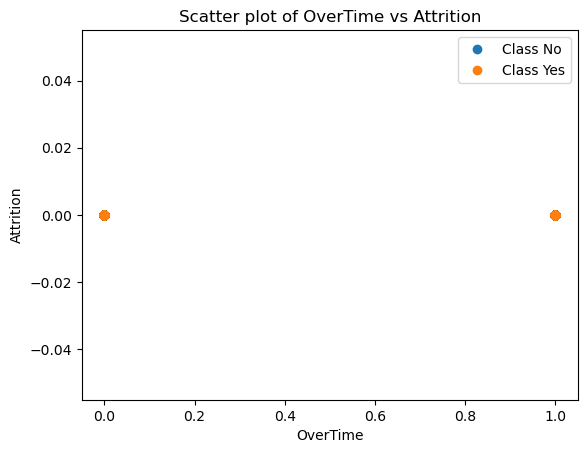

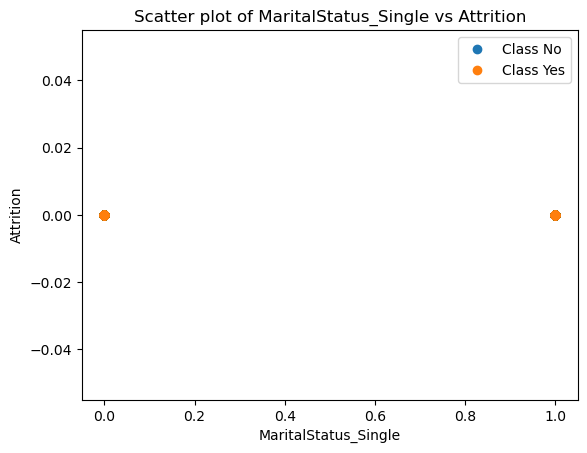

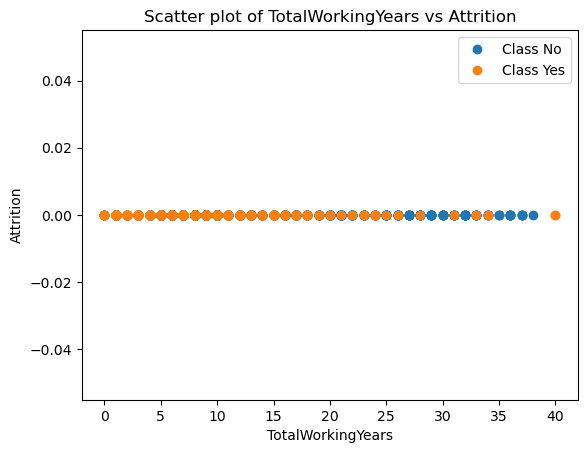

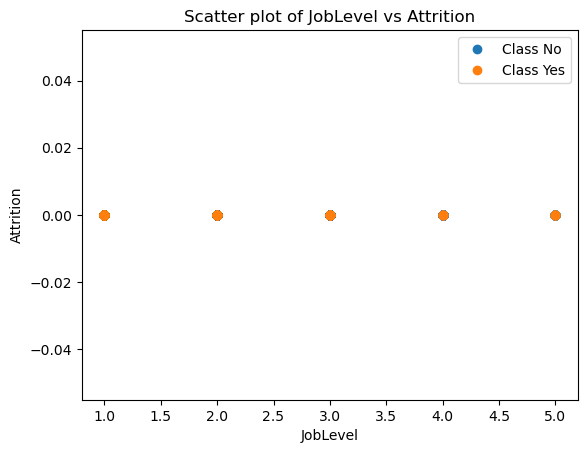

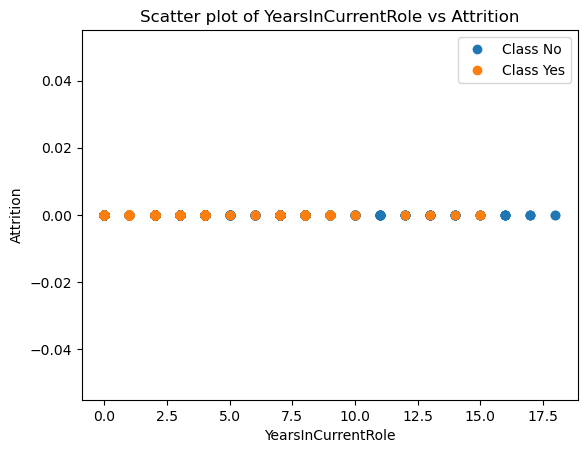

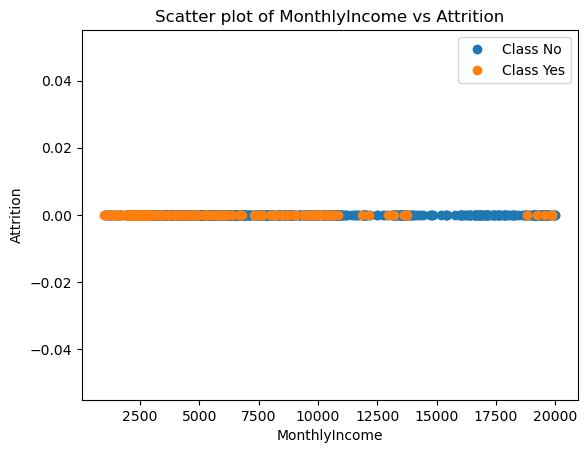

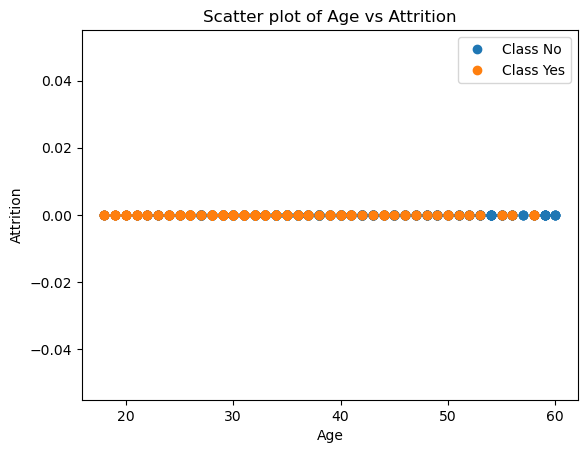

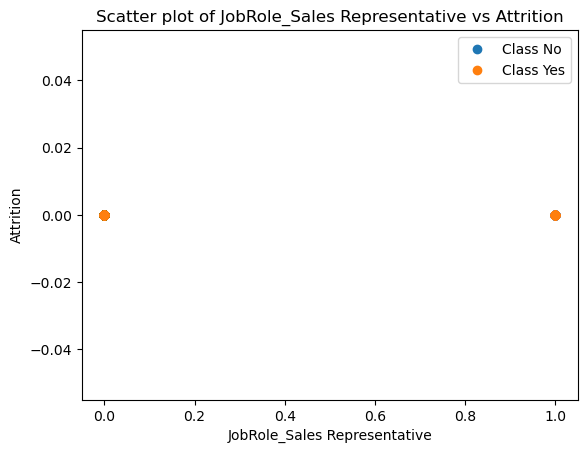

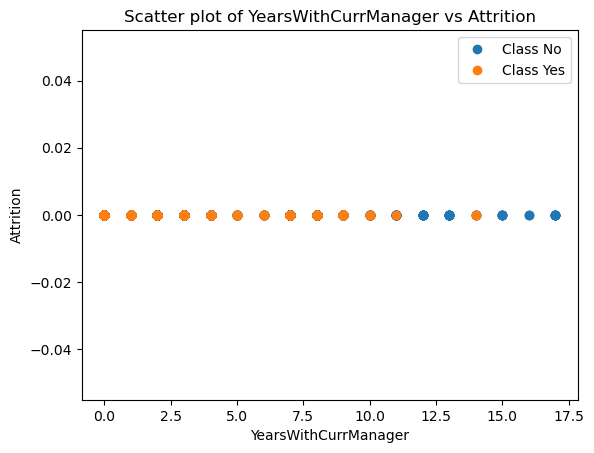

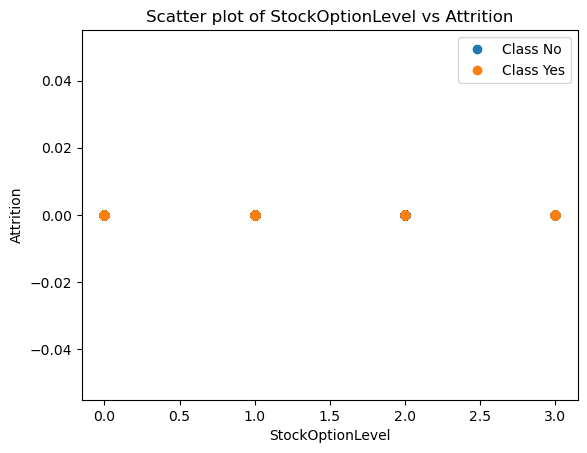

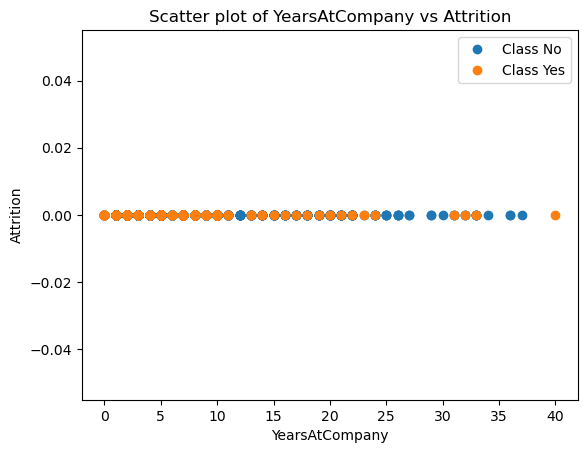

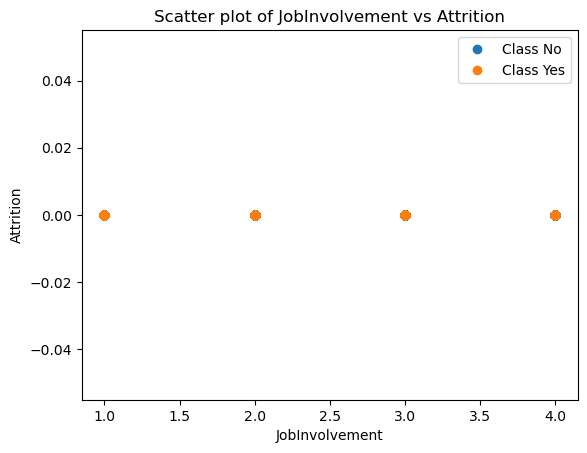

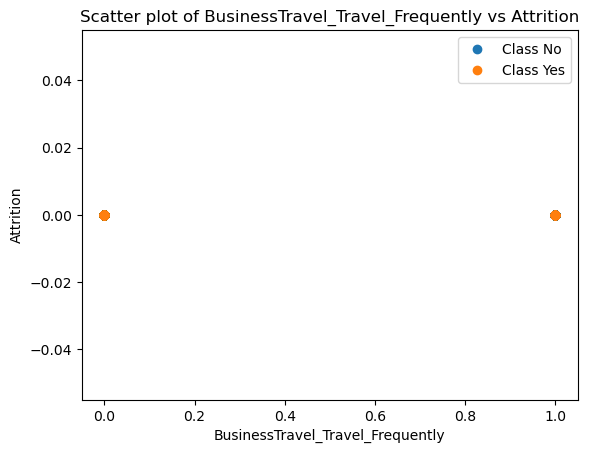

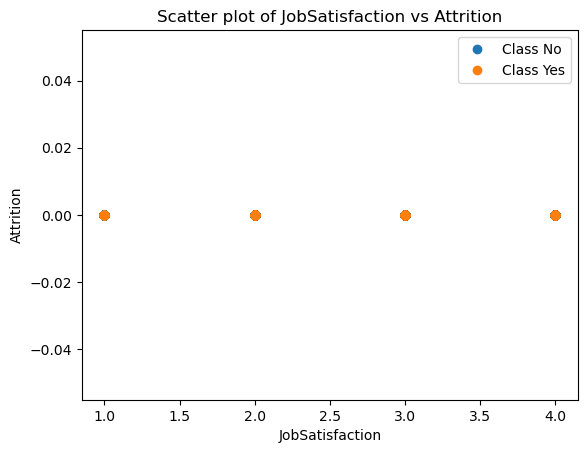

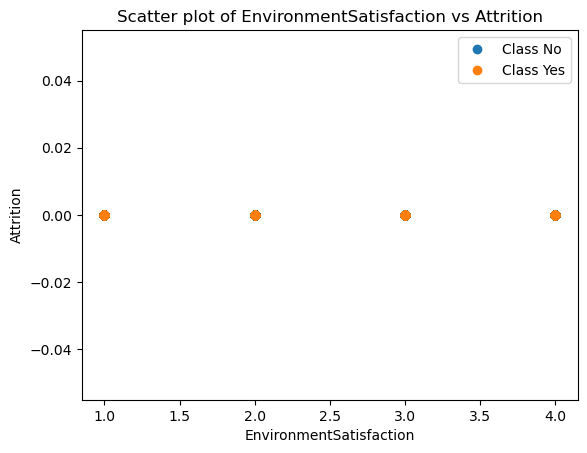

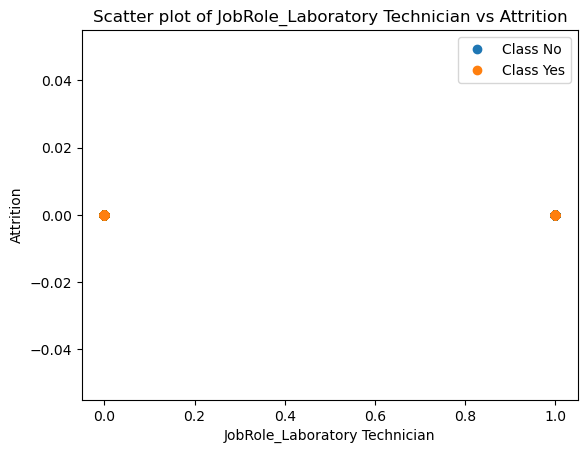

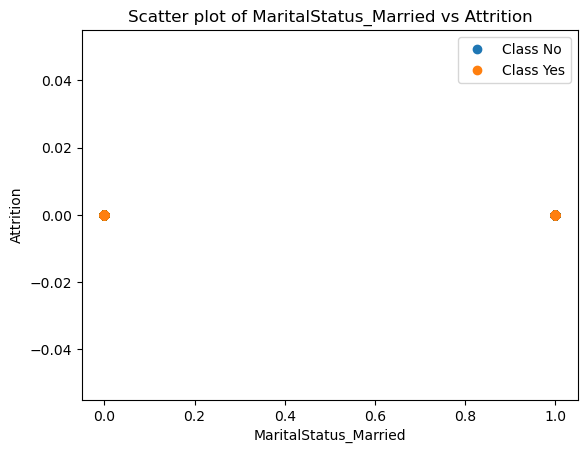

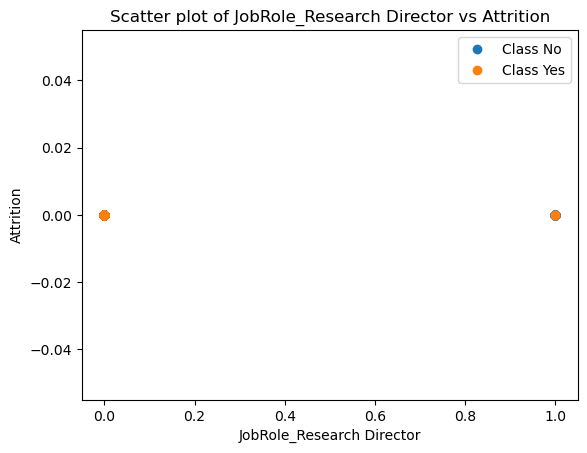

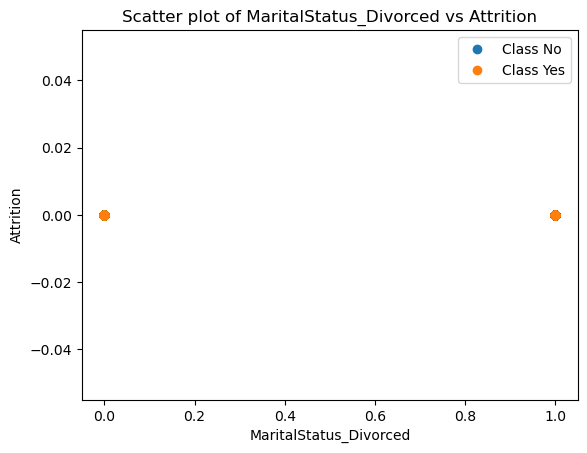

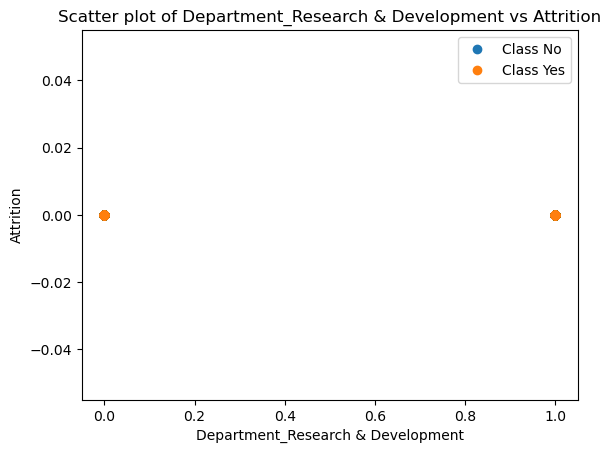

In [62]:
import matplotlib.pyplot as plt
import numpy as np 

# Select the top 20 columns with the highest correlation with the target variable
top_20_features = correlations.index[0:20]  

# Separate the data based on numeric labels
class_0 = Features.loc[Labels['Attrition'] == 0]
class_1 = Features.loc[Labels['Attrition']  == 1]

# 1D scatter plots for the top 20 features
for feature in top_20_features:
    plt.plot(class_0[feature], np.zeros_like(class_0[feature]), 'o', label='Class No')
    plt.plot(class_1[feature], np.zeros_like(class_1[feature]), 'o', label='Class Yes')
    plt.title(f"Scatter plot of {feature} vs Attrition")
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.show()

In [63]:
features_top20 = scaled_features[top_20_features]
features_top20

,OverTime,MaritalStatus_Single,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,JobRole_Sales Representative,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,BusinessTravel_Travel_Frequently,JobSatisfaction,EnvironmentSatisfaction,JobRole_Laboratory Technician,MaritalStatus_Married,JobRole_Research Director,MaritalStatus_Divorced,Department_Research & Development
0,1,1.458650,-0.421642,-0.057788,-0.063296,-0.108350,0.446350,-0.244625,0.245834,-0.932014,-0.164613,0.379672,-0.481859,1.153254,-0.660531,-0.462464,-0.918921,-0.239904,-0.534873,-1.374051
1,0,-0.685565,-0.164511,-0.057788,0.764998,-0.291719,1.322365,-0.244625,0.806541,0.241988,0.488508,-1.026167,2.075297,-0.660853,0.254625,-0.462464,1.088232,-0.239904,-0.534873,0.727775
2,1,1.458650,-0.550208,-0.961486,-1.167687,-0.937654,0.008343,-0.244625,-1.155935,-0.932014,-1.144294,-1.026167,-0.481859,0.246200,1.169781,2.162331,-0.918921,-0.239904,-0.534873,0.727775
3,1,-0.685565,-0.421642,-0.961486,0.764998,-0.763634,-0.429664,-0.244625,-1.155935,-0.932014,0.161947,0.379672,2.075297,0.246200,1.169781,-0.462464,1.088232,-0.239904,-0.534873,0.727775
4,0,-0.685565,-0.678774,-0.961486,-0.615492,-0.644858,-1.086676,-0.244625,-0.595227,0.241988,-0.817734,0.379672,-0.481859,-0.660853,-1.575686,2.162331,1.088232,-0.239904,-0.534873,0.727775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,-0.685565,0.735447,-0.057788,-0.615492,-0.835451,-0.101159,-0.244625,-0.314873,0.241988,-0.327893,1.785511,2.075297,1.153254,0.254625,2.162331,1.088232,-0.239904,-0.534873,0.727775
1466,0,-0.685565,-0.293077,0.845911,0.764998,0.741140,0.227347,-0.244625,0.806541,0.241988,-0.001333,-1.026167,-0.481859,-1.567907,1.169781,-0.462464,1.088232,-0.239904,-0.534873,0.727775
1467,1,-0.685565,-0.678774,-0.057788,-0.615492,-0.076690,-1.086676,-0.244625,-0.314873,0.241988,-0.164613,1.785511,-0.481859,-0.660853,-0.660531,-0.462464,1.088232,-0.239904,-0.534873,0.727775
1468,0,-0.685565,0.735447,-0.057788,0.488900,-0.236474,1.322365,-0.244625,1.086895,-0.932014,0.325228,-1.026167,2.075297,-0.660853,1.169781,-0.462464,1.088232,-0.239904,-0.534873,-1.374051


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assume X and y are your input matrices
# X --> (number of rows, number of columns), already scaled
# y --> binary target class (0 or 1)
# Dummy example data (replace these with your actual data)
# X = np.random.rand(100, 5) # Example feature matrix with 100 rows and 5 columns
# y = np.random.randint(0, 2, 100) # Example binary target vector
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_top20, Labels['Attrition'], test_size=0.2, random_state=42)
# Step 2: Initialize the Logistic Regression classifier
clf = LogisticRegression()
# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)
# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")


Accuracy of Logistic Regression classifier: 0.87
